In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q '/content/drive/My Drive/Datasets/GWA-T-13_Materna-Workload-Traces.zip'

In [3]:
#import libraries
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from numpy import unique
from numpy import where
import random

# Data reading and preprocessing

In [4]:
#read data
Materna_Traces = ['/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-1', 
        '/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-2',
        '/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-3']
for Materna_Trace in Materna_Traces:

  all_files = glob.glob(Materna_Trace + "/*.csv")

  data = []

  for filename in all_files:
      df = pd.read_csv(filename, delimiter=';', index_col=None, header=0)
      data.append(df)

  dataframe = pd.concat(data, axis=0, ignore_index=True)

dataframe.head()

,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,04.01.2016 00:00:00,4,0,93,"1,01",16777216,1283457,"7,65",0,14,304,5,109
1,04.01.2016 00:05:00,4,0,74,"0,8",16777216,1966290,"11,72",0,42,304,5,81
2,04.01.2016 00:10:00,4,0,64,"0,7",16777216,880804,"5,25",0,5,304,4,91
3,04.01.2016 00:15:00,4,0,145,"1,58",16777216,858993,"5,12",0,56,304,18,87
4,04.01.2016 00:20:00,4,0,586,"6,38",16777216,7145416,"42,59",0,852,304,53,119


In [5]:
#remove timestamp column
dataframe = dataframe.drop('Timestamp', axis=1)
#replace , with . in % values
dataframe = dataframe.replace(to_replace=r',', value='.', regex=True)

# Corellation


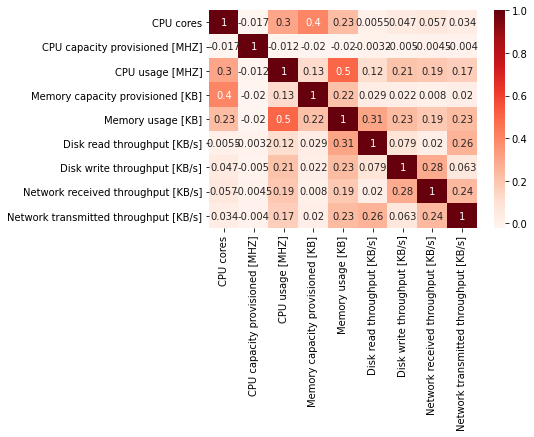

In [6]:
cor = dataframe.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


As there are no higher corelation value. We can't drop any feature value. 

# Histogram for data visualization

In [7]:
#make a copy dataset
data = dataframe[["CPU cores", "CPU capacity provisioned [MHZ]", "CPU usage [MHZ]", 
                  "Memory capacity provisioned [KB]",
                  "Memory usage [KB]", "Disk read throughput [KB/s]",
                  "Disk write throughput [KB/s]", "Disk size [GB]",
                  "Network received throughput [KB/s]",
                  "Network transmitted throughput [KB/s]"]]
#rename the columns
data = data.rename(columns={"CPU capacity provisioned [MHZ]": "CPU capacity", "CPU usage [MHZ]": "CPU usage",
                   'Memory capacity provisioned [KB]':'Memory capacity', 'Memory usage [KB]':'Memory usage', 
                   'Disk read throughput [KB/s]': 'Disk read [KB/s]', 'Disk write throughput [KB/s]':'Disk write [KB/s]',
                   'Network received throughput [KB/s]':'N/W received [KB/s]', 'Network transmitted throughput [KB/s]':'N/W transmitted [KB/s]'})

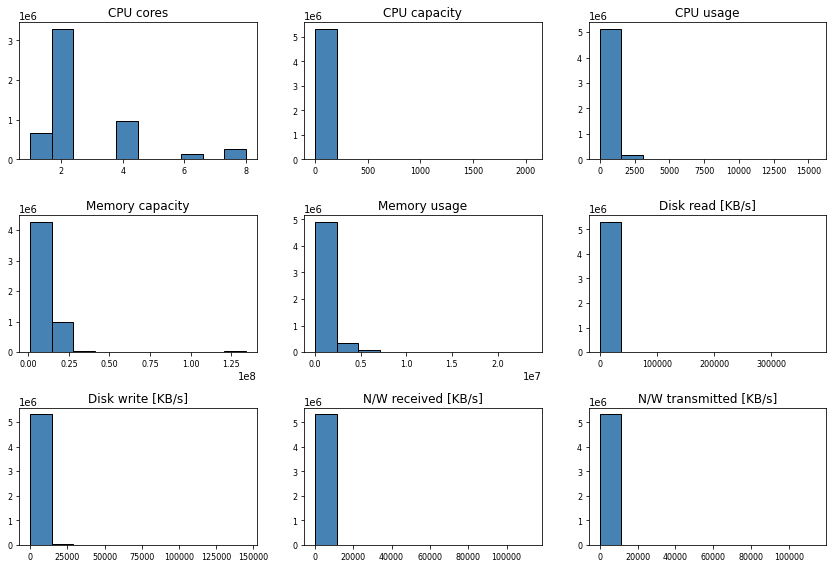

In [8]:
#Histogram for each feature
data.hist(color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

# DBSCAN Clustering on different metrics
As DBSCAN can cluster any shape of data, I am using it to decide proper metric.

In [9]:
# define function for dbscan clustering
def dbscan(eps, min_samples, data, start, end):
  # define the model
  model = DBSCAN(eps, min_samples)
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, start], data[row_ix, end])
    plt.title("eps="+str(eps)+"    "+"min_samples="+str(min_samples))
  # show the plot
  plt.show()

# All features

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  after removing the cwd from sys.path.


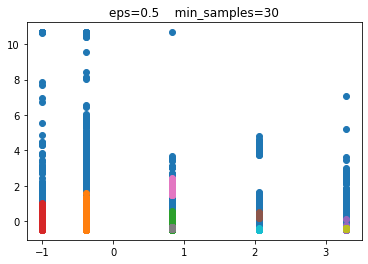

In [10]:
#standard scale data
machine_data_std = StandardScaler().fit_transform(dataframe)
#randomly choose ten thousand samples
machine_data_index = np.random.random_integers(1, dataframe.shape[0], 10000)
#Apply DBSCAN algorithm
dbscan(eps=0.5, min_samples=30, data=machine_data_std[machine_data_index], start=0, end=3)

# Only CPU data metric

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  


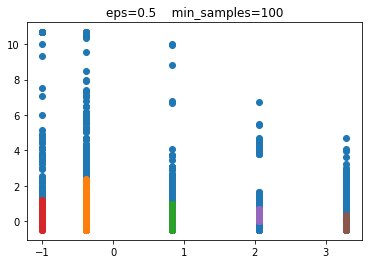

In [11]:
#Choose CPU related features
cpu_data = dataframe[['CPU cores', 'CPU capacity provisioned [MHZ]', 'CPU usage [MHZ]', 'CPU usage [%]']]
#standard scale data
cpu_data_std = StandardScaler().fit_transform(cpu_data)
#Randomly choose ten thousand samples 
machine_data_index = np.random.random_integers(1, dataframe.shape[0], 10000)

dbscan(eps=0.5, min_samples=100, data=cpu_data_std[machine_data_index], start=0, end=3)

# CPU and Memory data metric

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  import sys


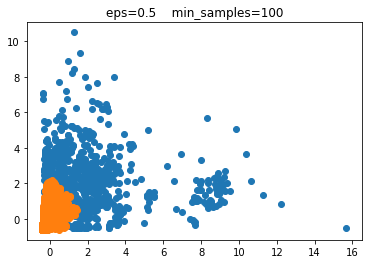

In [12]:
#Only CPU and Memory related features
cpu_mem_data = dataframe[['CPU capacity provisioned [MHZ]', 'CPU usage [MHZ]', 'Memory capacity provisioned [KB]',
       'Memory usage [KB]']]
#standard scale data
cpu_mem_data_std = StandardScaler().fit_transform(cpu_mem_data)
#randomly choose ten thousand samples
machine_data_index = np.random.random_integers(1, dataframe.shape[0], 10000)
#Apply DBSCAN algorithm
dbscan(eps=0.5, min_samples=100, data=cpu_mem_data_std[machine_data_index], start=1, end=3)

# CPU, Memory and Disk data metric

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  


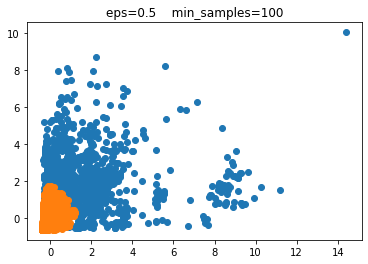

In [13]:
#choose CPU, Memory and Disk related features
cpu_mem_disk_data = dataframe[['CPU capacity provisioned [MHZ]', 'CPU usage [MHZ]', 'Memory capacity provisioned [KB]',
       'Memory usage [KB]', 'Disk read throughput [KB/s]',
       'Disk write throughput [KB/s]', 'Disk size [GB]']]
#standard scale data
cpu_mem_disk_data_std = StandardScaler().fit_transform(cpu_mem_disk_data)
#randomly choose ten thousand samples
machine_data_index = np.random.random_integers(1, dataframe.shape[0], 10000)
#Apply DBSCAN algorithm
dbscan(eps=0.5, min_samples=100, data=cpu_mem_disk_data_std[machine_data_index], start=1, end=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


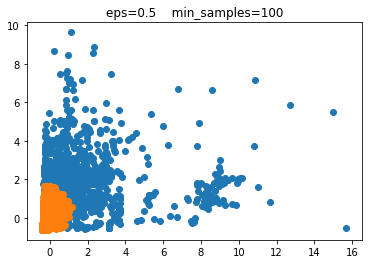

In [14]:
#choose CPU, Memory, Disk and network related features
cpu_mem_disk_NW_data = dataframe[['CPU capacity provisioned [MHZ]', 
                                  'CPU usage [MHZ]', 'Memory capacity provisioned [KB]',
                                  'Memory usage [KB]', 'Disk read throughput [KB/s]',
                                  'Disk write throughput [KB/s]', 'Disk size [GB]', 
                                  'Network received throughput [KB/s]',
                                  'Network transmitted throughput [KB/s]']]
#standard scale data
cpu_mem_disk_NW_data_std = StandardScaler().fit_transform(cpu_mem_disk_NW_data)
#randomly choose ten thousand samples
machine_data_index = np.random.random_integers(1, dataframe.shape[0], 10000)
#Apply DBSCAN algorithm
dbscan(eps=0.5, min_samples=100, data=cpu_mem_disk_NW_data_std[machine_data_index], start=1, end=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  import sys


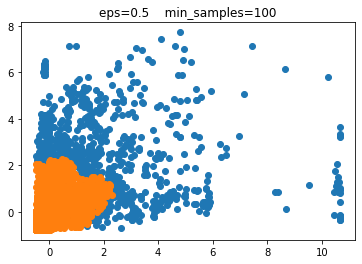

In [15]:
#choose CPU, Memory, Disk usage related features
cpu_mem_disk_use_data = dataframe[['CPU usage [%]','Memory usage [%]','Disk read throughput [KB/s]',
                        'Disk write throughput [KB/s]']]
#standard scale data
cpu_mem_disk_use_data_std = StandardScaler().fit_transform(cpu_mem_disk_use_data)
#randomly choose ten thousand samples
machine_data_index = np.random.random_integers(1, dataframe.shape[0], 10000)
#Apply DBSCAN algorithm
dbscan(eps=0.5, min_samples=100, data=cpu_mem_disk_use_data_std[machine_data_index], start=0, end=1)

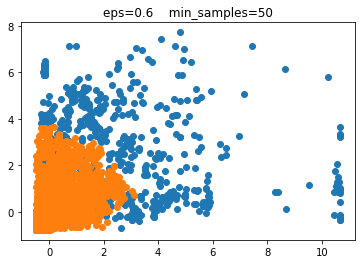

In [17]:
#DBSCAN using different parameters
dbscan(eps=0.6, min_samples=50, data=cpu_mem_disk_use_data_std[machine_data_index], start=0, end=1)

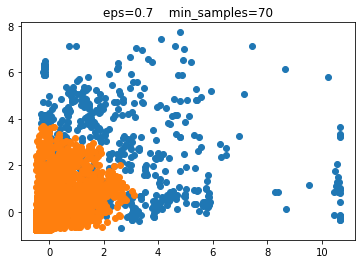

In [19]:
#DBSCAN using different parameters
dbscan(eps=0.7, min_samples=70, data=cpu_mem_disk_use_data_std[machine_data_index], start=0, end =1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


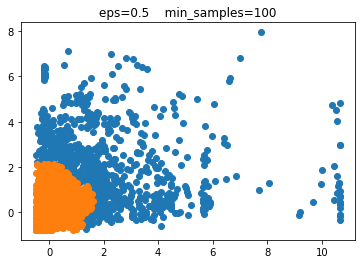

In [20]:
#choose CPU, Memory, Disk and network usage related features
cpu_mem_disk_NW_use_data = dataframe[['CPU usage [%]',
                                   'Memory usage [%]',
                                   'Disk read throughput [KB/s]',
                                   'Disk write throughput [KB/s]', 
                                  'Network received throughput [KB/s]',
                                  'Network transmitted throughput [KB/s]']]
#standard scale data                          
cpu_mem_disk_NW_use_data_std = StandardScaler().fit_transform(cpu_mem_disk_NW_use_data)
#randomly choose ten thousand samples
machine_data_index = np.random.random_integers(1, dataframe.shape[0], 10000)
#Apply DBSCAN algorithm
dbscan(eps=0.5, min_samples=100, data=cpu_mem_disk_NW_use_data_std[machine_data_index], start=0, end=1)

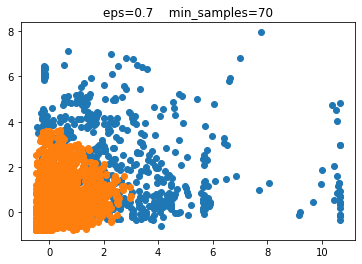

In [21]:
#DBSCAN using different parameters
dbscan(eps=0.7, min_samples=70, data=cpu_mem_disk_NW_use_data_std[machine_data_index], start=0, end=1)

# Conclusion
We can use CPU usage [%], Memory usage [%], Disk read throughput [KB/s],
                        Disk write throughput [KB/s] metric for clustering of machines as it provide similar results as last matric. So, we can neglect network related columns.